In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import web scrapping libraries
import requests
import re
from bs4 import BeautifulSoup
from selenium import webdriver

In [2]:
# import warnings to avoid warnigs
import warnings 
warnings.filterwarnings("ignore")

1.__Numpy__ == Numpy is a general-purpose array-processing package.
                It provides a high-performance multidimensional array object, and tools for working with these arrays.

2.__Pandas__ == Pandas is fast and it has high performance & productivity for users.

3.__Matplotlib__ == Matplotlib is easy to use and an amazing visualizing library in Python.
                     It consists of several plots like line, bar, scatter, histogram, etc. 

In [2]:
URL=["https://www.cars24.com/buy-used-car?sort=P&storeCityId=2378&pinId=400001&page=2",#mumbai
    "https://www.cars24.com/buy-used-car?sort=P&storeCityId=3686&pinId=500001&page=2", # hyderabad
    "https://www.cars24.com/buy-used-car?sort=P&storeCityId=2&pinId=110001&page=2", # Delhi
     "https://www.cars24.com/buy-used-car?sort=P&storeCityId=4709&pinId=560001&page=2",# benguluru
     "https://www.cars24.com/buy-used-car?sort=P&storeCityId=5732&pinId=600001&page=2"] # chennai

In [3]:
URL=[]
for i in range(2,15):
    URL.append("https://www.cars24.com/buy-used-car?sort=P&storeCityId=2378&pinId=400001&page={}".format(i))
for i in range(2,10):
    URL.append("https://www.cars24.com/buy-used-car?sort=P&storeCityId=3686&pinId=500001&page={}".format(i))
for i in range(2,15):
    URL.append("https://www.cars24.com/buy-used-car?sort=P&storeCityId=2&pinId=110001&page={}".format(i))
for i in range(2,22):
    URL.append("https://www.cars24.com/buy-used-car?sort=P&storeCityId=4709&pinId=560001&page={}".format(i))
for i in range(2,13):
    URL.append("https://www.cars24.com/buy-used-car?sort=P&storeCityId=5732&pinId=600001&page={}".format(i))

In [22]:
URL

['https://www.cars24.com/buy-used-car?sort=P&storeCityId=2378&pinId=400001&page=2',
 'https://www.cars24.com/buy-used-car?sort=P&storeCityId=2378&pinId=400001&page=3',
 'https://www.cars24.com/buy-used-car?sort=P&storeCityId=2378&pinId=400001&page=4',
 'https://www.cars24.com/buy-used-car?sort=P&storeCityId=2378&pinId=400001&page=5',
 'https://www.cars24.com/buy-used-car?sort=P&storeCityId=2378&pinId=400001&page=6',
 'https://www.cars24.com/buy-used-car?sort=P&storeCityId=2378&pinId=400001&page=7',
 'https://www.cars24.com/buy-used-car?sort=P&storeCityId=2378&pinId=400001&page=8',
 'https://www.cars24.com/buy-used-car?sort=P&storeCityId=2378&pinId=400001&page=9',
 'https://www.cars24.com/buy-used-car?sort=P&storeCityId=2378&pinId=400001&page=10',
 'https://www.cars24.com/buy-used-car?sort=P&storeCityId=2378&pinId=400001&page=11',
 'https://www.cars24.com/buy-used-car?sort=P&storeCityId=2378&pinId=400001&page=12',
 'https://www.cars24.com/buy-used-car?sort=P&storeCityId=2378&pinId=40000

In [23]:
%%time
#create an empty lists
Description=[]
Car_Type=[]
EMI=[]
O_Price=[]
Specification=[]
location=[]
Discount=[]
for url in URL:
    
    page=requests.get(url)
    htmlcode=page.text
    soup=BeautifulSoup(htmlcode)
    
    # create a data
    data=soup.find_all("a",class_="_9Ue0B")
    for i in data:
        
        
        # DEscription
        desc=i.find("h2",class_="_3FpCg")
        if desc is None:
            Description.append(np.NaN)
        else:
            Description.append(desc.text)
            
       
        #Car_type
        car_type=i.find("p",class_="cvakB")
        if car_type is None:
            Car_Type.append(np.NaN)
        else:
            Car_Type.append(car_type.text)
            
        #EMI\
        emi=i.find("div",class_="_2HFRN")
        if emi is None:
            EMI.append(np.NaN)
        else:
            EMI.append(emi.text)
            
        #original_price
        o_price=i.find("div",class_="_7udZZ")
        if o_price is None:
            O_Price.append(np.NaN)
        else:
            O_Price.append(o_price.text)
        #specification
        specification=i.find("ul",class_="bVR0c")
        if specification is None:
            Specification.append(np.NaN)
        else:
            Specification.append(specification.text)
            
        # Discount
        discount=i.find("div",class_="_3mZ8j")
        if discount is None:
            Discount.append(np.NaN)
        else:
            Discount.append(discount.text)
        # Location
        if "pinId=400001" in url:
            location.append("Mumbai")
        elif "pinId=500001" in url:
            location.append("Hyderabad")
        elif "pinId=110001" in url:
            location.append("Delhi")
        elif "pinId=560001" in url:
            location.append("Bengaluru")
        elif "pinId=600001" in url:
            location.append("Chennai")
        else:
            location.append(np.NaN)
            

Wall time: 3min 28s


In [53]:
# checking length of data

In [24]:
print(len(Description))
print(len(Specification))
print(len(Car_Type))
print(len(O_Price))
print(len(EMI))
print(len(location))
print(len(Discount))

1186
1186
1186
1186
1186
1186
1186


# Create a Data frame

In [25]:
k={"Descriptions":Description,"Specifications":Specification,"Cartype":Car_Type,"original_price":O_Price,"Emi":EMI,
  "location":location,"Discounts":Discount}

In [26]:
df1=pd.DataFrame(k)
df1

,Descriptions,Specifications,Cartype,original_price,Emi,location,Discounts
0,2021 Hyundai VENUE,"11,197 km1st OwnerPetrol",S MT 1.2 KAPPA Manual,"₹936,099","₹20,823/month",Mumbai,NaN
1,2017 Maruti IGNIS,"31,550 km2nd OwnerPetrol",ZETA 1.2 K12 AMT Automatic,"₹549,099","₹12,214/month",Mumbai,NaN
2,2017 Hyundai Elite i20,"40,991 km1st OwnerPetrol",Magna Executive 1.2 Manual,"₹558,599","₹12,426/month",Mumbai,NaN
3,2014 Toyota Corolla Altis,"22,359 km2nd OwnerPetrol",J S Manual,"₹706,299","₹15,711/month",Mumbai,NaN
4,2019 Hyundai VENUE,"8,917 km1st OwnerPetrol",1.0 TURBO GDI SX+ AT Automatic,"₹1,162,699","₹25,864/month",Mumbai,NaN
...,...,...,...,...,...,...,...
1181,2013 Hyundai i10,"21,243 km1st OwnerPetrol",MAGNA 1.2 KAPPA2 Manual,"₹373,199","₹8,302/month",Chennai,NaN
1182,2018 Maruti Swift,"87,677 km1st OwnerPetrol",ZXI Manual,"₹599,899","₹13,344/month",Chennai,NaN
1183,2015 Maruti Swift Dzire,"56,836 km1st OwnerPetrol",VXI AT Automatic,"₹523,599","₹11,647/month",Chennai,NaN
1184,2017 Maruti Swift,"41,245 km1st OwnerPetrol",VXI Manual,"₹607,599","₹13,516/month",Chennai,NaN


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Descriptions    1186 non-null   object
 1   Specifications  1186 non-null   object
 2   Cartype         1186 non-null   object
 3   original_price  1186 non-null   object
 4   Emi             1186 non-null   object
 5   location        1186 non-null   object
 6   Discounts       26 non-null     object
dtypes: object(7)
memory usage: 65.0+ KB


## Upload Data into CSV file

In [128]:
df1.to_csv("Used-Car-Details.csv",index=False)

## Import CSV file 

In [3]:
df=pd.read_csv("Used-Car-Details.csv")

In [4]:
df

,Descriptions,Specifications,Cartype,original_price,Emi,location,Discounts
0,2021 Hyundai VENUE,"11,197 km1st OwnerPetrol",S MT 1.2 KAPPA Manual,"₹936,099","₹20,823/month",Mumbai,NaN
1,2017 Maruti IGNIS,"31,550 km2nd OwnerPetrol",ZETA 1.2 K12 AMT Automatic,"₹549,099","₹12,214/month",Mumbai,NaN
2,2017 Hyundai Elite i20,"40,991 km1st OwnerPetrol",Magna Executive 1.2 Manual,"₹558,599","₹12,426/month",Mumbai,NaN
3,2014 Toyota Corolla Altis,"22,359 km2nd OwnerPetrol",J S Manual,"₹706,299","₹15,711/month",Mumbai,NaN
4,2019 Hyundai VENUE,"8,917 km1st OwnerPetrol",1.0 TURBO GDI SX+ AT Automatic,"₹1,162,699","₹25,864/month",Mumbai,NaN
...,...,...,...,...,...,...,...
1181,2013 Hyundai i10,"21,243 km1st OwnerPetrol",MAGNA 1.2 KAPPA2 Manual,"₹373,199","₹8,302/month",Chennai,NaN
1182,2018 Maruti Swift,"87,677 km1st OwnerPetrol",ZXI Manual,"₹599,899","₹13,344/month",Chennai,NaN
1183,2015 Maruti Swift Dzire,"56,836 km1st OwnerPetrol",VXI AT Automatic,"₹523,599","₹11,647/month",Chennai,NaN
1184,2017 Maruti Swift,"41,245 km1st OwnerPetrol",VXI Manual,"₹607,599","₹13,516/month",Chennai,NaN


# Check info of data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Descriptions    1186 non-null   object
 1   Specifications  1186 non-null   object
 2   Cartype         1186 non-null   object
 3   original_price  1186 non-null   object
 4   Emi             1186 non-null   object
 5   location        1186 non-null   object
 6   Discounts       26 non-null     object
dtypes: object(7)
memory usage: 65.0+ KB


### checking null values


In [6]:
df.isnull().sum()

Descriptions         0
Specifications       0
Cartype              0
original_price       0
Emi                  0
location             0
Discounts         1160
dtype: int64

#### split description

In [7]:
s=df["Descriptions"].str.split(" ",n=-1,expand=True)


In [8]:
df["Year"]=s[0]
df["Brand"]=s[1]
df["Model"]=s[2]


In [9]:
df["Brand"].value_counts()

Maruti        578
Hyundai       281
Ford           95
Honda          61
Toyota         42
Renault        32
Tata           27
Volkswagen     26
Mahindra       13
MG              7
KIA             6
Nissan          4
BMW             3
Datsun          3
Jeep            2
Skoda           2
Audi            2
Volvo           1
Mercedes        1
Name: Brand, dtype: int64

In [10]:
df["Model"].value_counts()

Swift       141
Alto         91
Baleno       80
Ecosport     68
Elite        62
           ... 
Benz          1
Civic         1
X1            1
S60           1
A             1
Name: Model, Length: 79, dtype: int64

#### split Emi value

In [11]:
df["Emi"].replace(to_replace=["₹",",","/month"],value="",regex=True,inplace=True)


#### split discount

In [12]:
df["Discounts"].replace(to_replace=["₹",",","OFF"],value="",regex=True,inplace=True)

#### split original price

In [13]:
df["original_price"].replace(to_replace=["₹",","],value="",regex=True,inplace=True)

#### split specifications

#### separate kms

In [14]:
regex = '([,\d]+\skm)'
df['km'] = df.Specifications.apply(lambda x : re.findall(regex,x) if x!="NaN" else x)
df.km = df.km.apply(lambda x: "".join(x))
df['km'].replace(to_replace=["km",','],value="",inplace=True,regex=True)

#### separate owners 

In [15]:
regex="(1st|2nd)"
df["Owner"]=df.Specifications.apply(lambda x : re.findall(regex,x) if x!="NaN" else x)

In [16]:
df["Owner"]=df["Owner"].apply(lambda x : "".join(x))
df["Owner"].replace(to_replace=[",","km"],value="",inplace=True,regex=True)

#### fuel type

In [17]:
regex = '(Petrol|Diesel)'
df['fuel_Type'] = df["Specifications"].apply(lambda x : re.findall(regex,x) if x!='NaN' else x)
df["fuel_Type"] = df["fuel_Type"].apply(lambda x: "".join(x))

#### car type

In [18]:
regex = '(Manual|Automatic)'
df['Type'] = df["Cartype"].apply(lambda x : re.findall(regex,x) if x!='NaN' else x)
df["Type"] = df["Type"].apply(lambda x: "".join(x))

#### engine-type

In [19]:
df["Cartype"].replace(to_replace=["Manual","Automatic"],value="",inplace=True,regex=True)


In [20]:
df

,Descriptions,Specifications,Cartype,original_price,Emi,location,Discounts,Year,Brand,Model,km,Owner,fuel_Type,Type
0,2021 Hyundai VENUE,"11,197 km1st OwnerPetrol",S MT 1.2 KAPPA,936099,20823,Mumbai,NaN,2021,Hyundai,VENUE,11197,1st,Petrol,Manual
1,2017 Maruti IGNIS,"31,550 km2nd OwnerPetrol",ZETA 1.2 K12 AMT,549099,12214,Mumbai,NaN,2017,Maruti,IGNIS,31550,2nd,Petrol,Automatic
2,2017 Hyundai Elite i20,"40,991 km1st OwnerPetrol",Magna Executive 1.2,558599,12426,Mumbai,NaN,2017,Hyundai,Elite,40991,1st,Petrol,Manual
3,2014 Toyota Corolla Altis,"22,359 km2nd OwnerPetrol",J S,706299,15711,Mumbai,NaN,2014,Toyota,Corolla,22359,2nd,Petrol,Manual
4,2019 Hyundai VENUE,"8,917 km1st OwnerPetrol",1.0 TURBO GDI SX+ AT,1162699,25864,Mumbai,NaN,2019,Hyundai,VENUE,8917,1st,Petrol,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,2013 Hyundai i10,"21,243 km1st OwnerPetrol",MAGNA 1.2 KAPPA2,373199,8302,Chennai,NaN,2013,Hyundai,i10,21243,1st,Petrol,Manual
1182,2018 Maruti Swift,"87,677 km1st OwnerPetrol",ZXI,599899,13344,Chennai,NaN,2018,Maruti,Swift,87677,1st,Petrol,Manual
1183,2015 Maruti Swift Dzire,"56,836 km1st OwnerPetrol",VXI AT,523599,11647,Chennai,NaN,2015,Maruti,Swift,56836,1st,Petrol,Automatic
1184,2017 Maruti Swift,"41,245 km1st OwnerPetrol",VXI,607599,13516,Chennai,NaN,2017,Maruti,Swift,41245,1st,Petrol,Manual


# DROP UNWANTED COLUMNS

### drop Description,Spcification

In [21]:
df.drop(["Descriptions","Specifications"],axis=1,inplace=True)
df

,Cartype,original_price,Emi,location,Discounts,Year,Brand,Model,km,Owner,fuel_Type,Type
0,S MT 1.2 KAPPA,936099,20823,Mumbai,NaN,2021,Hyundai,VENUE,11197,1st,Petrol,Manual
1,ZETA 1.2 K12 AMT,549099,12214,Mumbai,NaN,2017,Maruti,IGNIS,31550,2nd,Petrol,Automatic
2,Magna Executive 1.2,558599,12426,Mumbai,NaN,2017,Hyundai,Elite,40991,1st,Petrol,Manual
3,J S,706299,15711,Mumbai,NaN,2014,Toyota,Corolla,22359,2nd,Petrol,Manual
4,1.0 TURBO GDI SX+ AT,1162699,25864,Mumbai,NaN,2019,Hyundai,VENUE,8917,1st,Petrol,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...
1181,MAGNA 1.2 KAPPA2,373199,8302,Chennai,NaN,2013,Hyundai,i10,21243,1st,Petrol,Manual
1182,ZXI,599899,13344,Chennai,NaN,2018,Maruti,Swift,87677,1st,Petrol,Manual
1183,VXI AT,523599,11647,Chennai,NaN,2015,Maruti,Swift,56836,1st,Petrol,Automatic
1184,VXI,607599,13516,Chennai,NaN,2017,Maruti,Swift,41245,1st,Petrol,Manual


In [22]:
df.isnull().sum()

Cartype              0
original_price       0
Emi                  0
location             0
Discounts         1160
Year                 0
Brand                0
Model                0
km                   0
Owner                0
fuel_Type            0
Type                 0
dtype: int64

### fill null  values with their median value

In [23]:
df["Discounts"].fillna(df["Discounts"].median(),inplace=True)

### convert all data types as int type

In [24]:
df["original_price"]=df["original_price"].astype(int)
df["Emi"]=df["Emi"].astype(int)
df["Discounts"]=df["Discounts"].astype(int)
df["Year"]=df["Year"].astype(int)
df["km"]=df["km"].astype(int)


In [25]:
df

,Cartype,original_price,Emi,location,Discounts,Year,Brand,Model,km,Owner,fuel_Type,Type
0,S MT 1.2 KAPPA,936099,20823,Mumbai,5000,2021,Hyundai,VENUE,11197,1st,Petrol,Manual
1,ZETA 1.2 K12 AMT,549099,12214,Mumbai,5000,2017,Maruti,IGNIS,31550,2nd,Petrol,Automatic
2,Magna Executive 1.2,558599,12426,Mumbai,5000,2017,Hyundai,Elite,40991,1st,Petrol,Manual
3,J S,706299,15711,Mumbai,5000,2014,Toyota,Corolla,22359,2nd,Petrol,Manual
4,1.0 TURBO GDI SX+ AT,1162699,25864,Mumbai,5000,2019,Hyundai,VENUE,8917,1st,Petrol,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...
1181,MAGNA 1.2 KAPPA2,373199,8302,Chennai,5000,2013,Hyundai,i10,21243,1st,Petrol,Manual
1182,ZXI,599899,13344,Chennai,5000,2018,Maruti,Swift,87677,1st,Petrol,Manual
1183,VXI AT,523599,11647,Chennai,5000,2015,Maruti,Swift,56836,1st,Petrol,Automatic
1184,VXI,607599,13516,Chennai,5000,2017,Maruti,Swift,41245,1st,Petrol,Manual


#### change column names

In [26]:
df=df.rename(columns={"Cartype":"Engine_Type","original_price":"Price",
                        "location":"Locations","fuel_Type":"Fuel_Type","Type":"Car_Type"})

### convert columns order type

In [27]:
df=df[["Year","Brand","Model","Engine_Type","Car_Type","Fuel_Type","Owner","km","Price","Discounts","Emi","Locations"]]

### Modified Data frame

In [28]:
df

,Year,Brand,Model,Engine_Type,Car_Type,Fuel_Type,Owner,km,Price,Discounts,Emi,Locations
0,2021,Hyundai,VENUE,S MT 1.2 KAPPA,Manual,Petrol,1st,11197,936099,5000,20823,Mumbai
1,2017,Maruti,IGNIS,ZETA 1.2 K12 AMT,Automatic,Petrol,2nd,31550,549099,5000,12214,Mumbai
2,2017,Hyundai,Elite,Magna Executive 1.2,Manual,Petrol,1st,40991,558599,5000,12426,Mumbai
3,2014,Toyota,Corolla,J S,Manual,Petrol,2nd,22359,706299,5000,15711,Mumbai
4,2019,Hyundai,VENUE,1.0 TURBO GDI SX+ AT,Automatic,Petrol,1st,8917,1162699,5000,25864,Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...
1181,2013,Hyundai,i10,MAGNA 1.2 KAPPA2,Manual,Petrol,1st,21243,373199,5000,8302,Chennai
1182,2018,Maruti,Swift,ZXI,Manual,Petrol,1st,87677,599899,5000,13344,Chennai
1183,2015,Maruti,Swift,VXI AT,Automatic,Petrol,1st,56836,523599,5000,11647,Chennai
1184,2017,Maruti,Swift,VXI,Manual,Petrol,1st,41245,607599,5000,13516,Chennai


### stats of data frame

In [29]:
df.describe()

,Year,km,Price,Discounts,Emi
count,1186.000000,1186.000000,1.186000e+03,1186.000000,1186.000000
mean,2016.067454,47500.092749,6.008402e+05,5270.820405,13365.360877
std,2.457161,35408.394016,2.697406e+05,3667.118014,6000.235365
min,2008.000000,120.000000,1.844990e+05,2929.000000,4104.000000
25%,2014.000000,22291.750000,4.196740e+05,5000.000000,9335.750000
50%,2016.000000,38730.000000,5.517490e+05,5000.000000,12273.000000
75%,2018.000000,64674.250000,6.907490e+05,5000.000000,15365.000000
max,2021.000000,277105.000000,2.726999e+06,102264.000000,60661.000000


### checking any null values in data frame

In [30]:
df.isnull().sum()

Year           0
Brand          0
Model          0
Engine_Type    0
Car_Type       0
Fuel_Type      0
Owner          0
km             0
Price          0
Discounts      0
Emi            0
Locations      0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         1186 non-null   int32 
 1   Brand        1186 non-null   object
 2   Model        1186 non-null   object
 3   Engine_Type  1186 non-null   object
 4   Car_Type     1186 non-null   object
 5   Fuel_Type    1186 non-null   object
 6   Owner        1186 non-null   object
 7   km           1186 non-null   int32 
 8   Price        1186 non-null   int32 
 9   Discounts    1186 non-null   int32 
 10  Emi          1186 non-null   int32 
 11  Locations    1186 non-null   object
dtypes: int32(5), object(7)
memory usage: 88.1+ KB


# Data Visualisation

# Univariate Analysis

# 1. Count plot

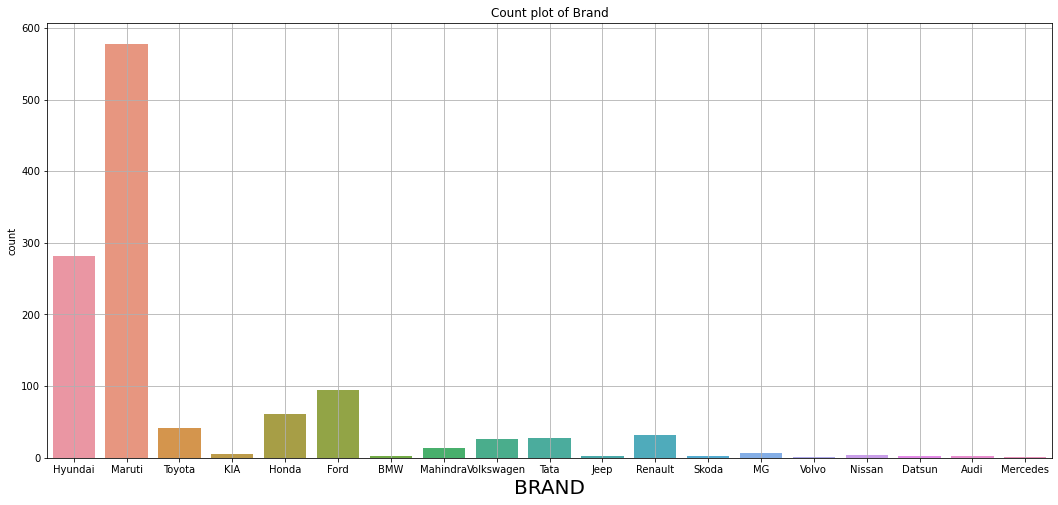

In [32]:
plt.figure(figsize=(18,8))
sns.countplot(x=df["Brand"])
plt.title("Count plot of Brand")
plt.xlabel("BRAND",size=20)
plt.grid()
plt.show()


Observation : In this data frame maruti brand cars are more buyed cars are available


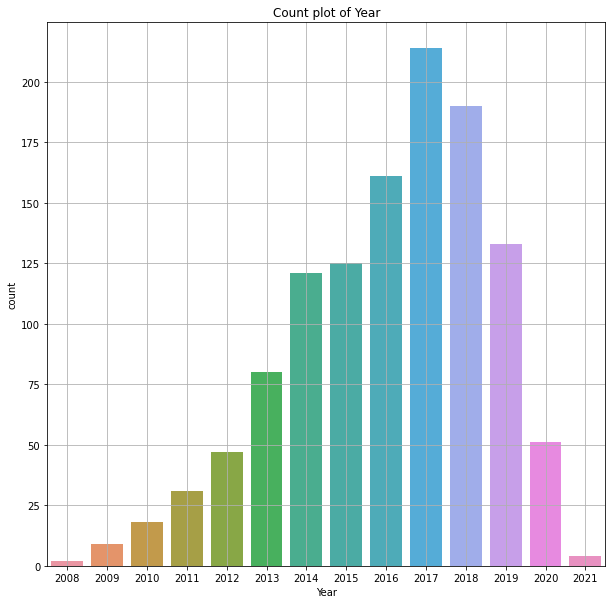

In [33]:
plt.figure(figsize=(10,10))
sns.countplot(x=df["Year"])
plt.title("Count plot of Year")
plt.grid()
plt.show()


Observation: In 2017 Year more  used cars available

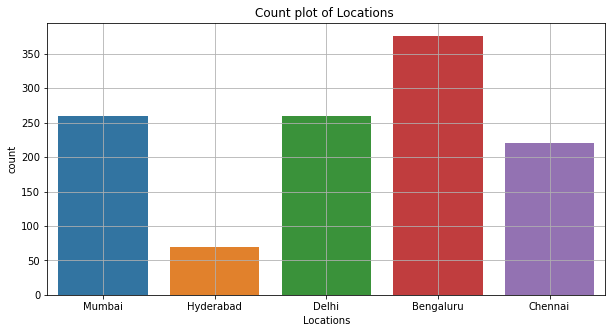

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["Locations"])
plt.title("Count plot of Locations ")
plt.grid()
plt.show()


Observation: In Bengaluru highest number of used cars are available

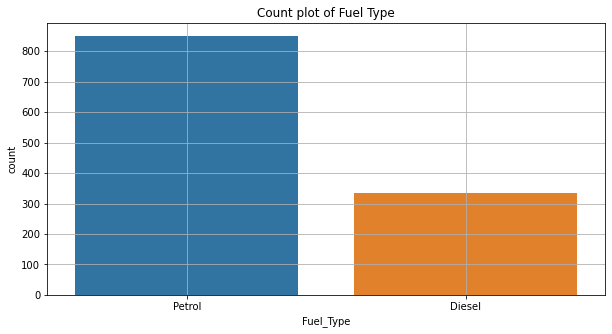

In [204]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["Fuel_Type"])
plt.title("Count plot of Fuel Type")
plt.grid()
plt.show()


Observation:Petrol used cars are more available in data

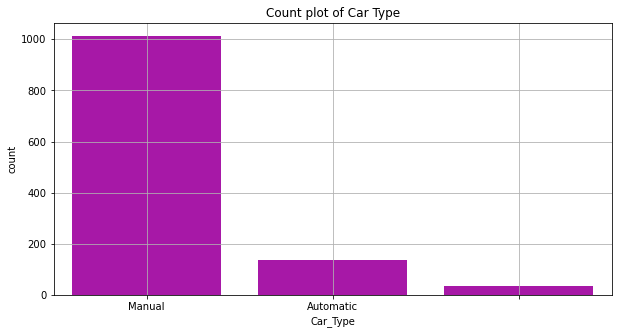

In [205]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["Car_Type"],color="m")
plt.title("Count plot of Car Type")
plt.grid()
plt.show()


Observation:Manual Type cars more available in data

# 2.Histogram

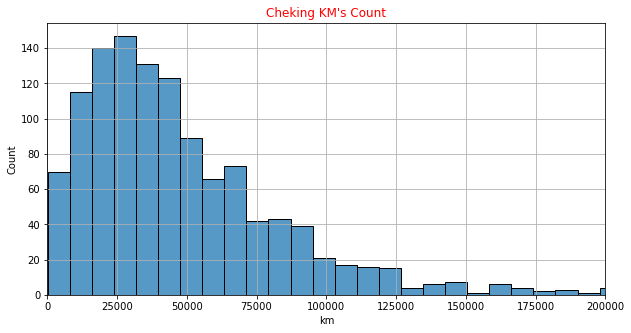

In [206]:
plt.figure(figsize=(10,5))
sns.histplot(x=df["km"],edgecolor="k")
plt.title("Cheking KM's Count",color="r")
plt.xlim(0,200000)
plt.grid()
plt.show()


Observation:Most Number of cars driven in b/w 20000-45000

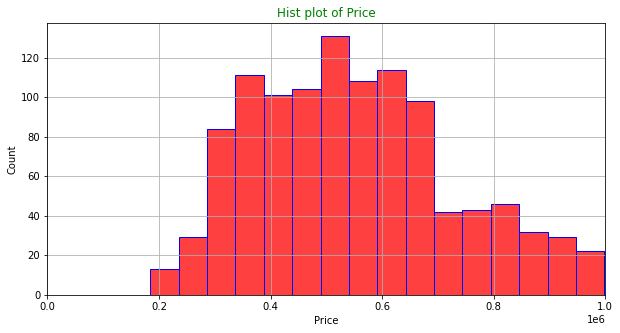

In [207]:
plt.figure(figsize=(10,5))
sns.histplot(x=df["Price"],color="red",edgecolor="b")
plt.title("Hist plot of Price",color="g")
plt.xlim(0,1000000)
plt.grid()
plt.show()


Observation:Number of cars price in b/w 4-6 lakh

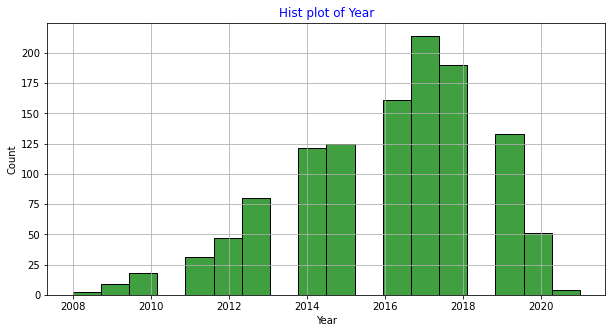

In [208]:
plt.figure(figsize=(10,5))
sns.histplot(x=df["Year"],color="green",edgecolor="k")
plt.title("Hist plot of Year",color="b")
plt.grid()
plt.show()


# 3.Distplot

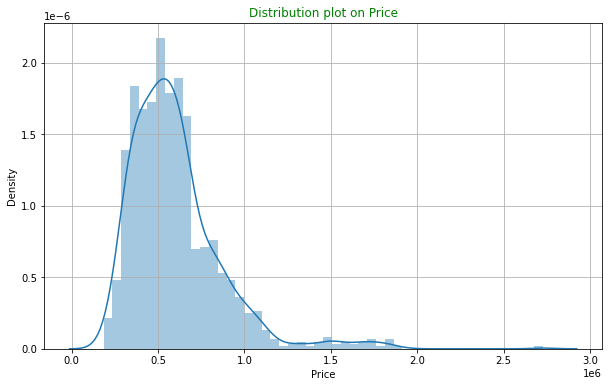

In [209]:
plt.figure(figsize=(10,6))
sns.distplot(df["Price"])
plt.title("Distribution plot on Price",color="green")
plt.grid()
plt.show()


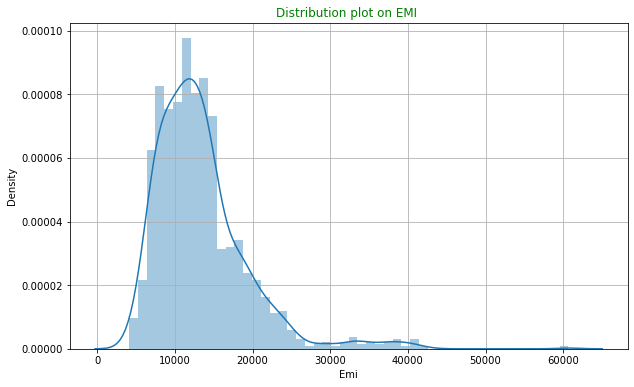

In [210]:
plt.figure(figsize=(10,6))
sns.distplot(df["Emi"])
plt.title("Distribution plot on EMI ",color="green")
plt.grid()
plt.show()


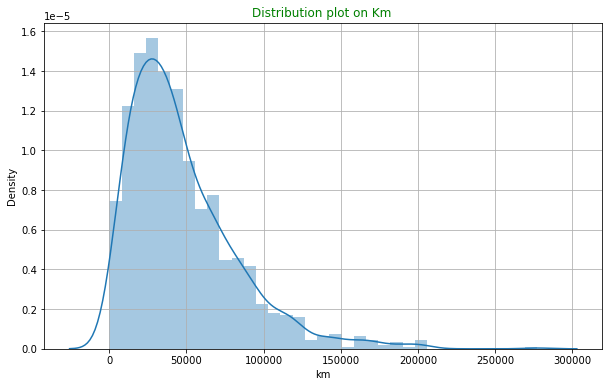

In [211]:
plt.figure(figsize=(10,6))
sns.distplot(df["km"])
plt.title("Distribution plot on Km ",color="green")
plt.grid()
plt.show()


# 4. Pie Chart

In [35]:
df.Locations.value_counts()

Bengaluru    376
Mumbai       260
Delhi        260
Chennai      220
Hyderabad     70
Name: Locations, dtype: int64

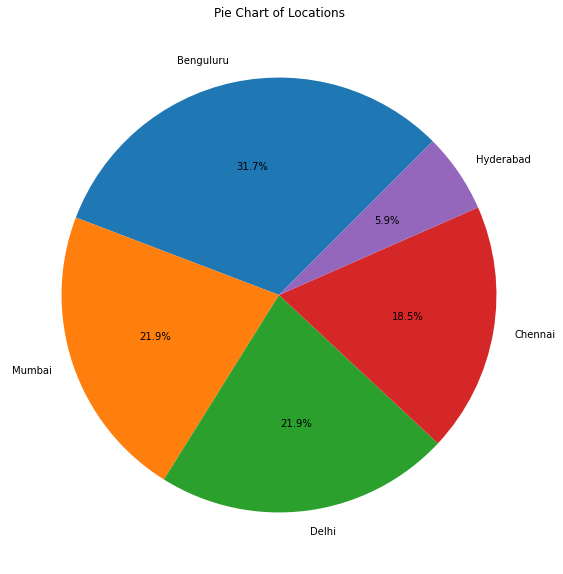

In [212]:
plt.figure(figsize=(10,10))
lable=["Benguluru","Mumbai","Delhi","Chennai","Hyderabad"]
plt.pie(df["Locations"].value_counts(),labels=lable,startangle=45,autopct="%1.1f%%")
plt.title("Pie Chart of Locations")
plt.show()

Observation:Highest nuber of cars available in Benguluru

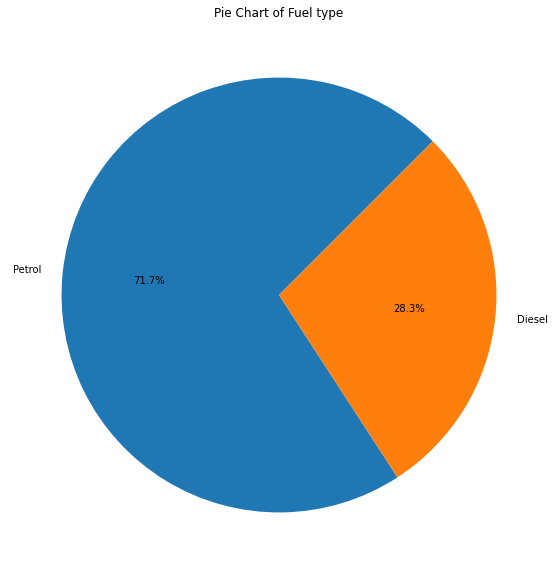

In [213]:
plt.figure(figsize=(10,10))
lable=["Petrol","Diesel"]
plt.pie(df["Fuel_Type"].value_counts(),labels=lable,startangle=45,autopct="%1.1f%%")
plt.title("Pie Chart of Fuel type")
plt.show()

# 5.boxplot

In [38]:
df.Emi.value_counts()

11509    4
14570    3
13040    3
12686    3
14799    3
        ..
7501     1
8371     1
9407     1
8577     1
9294     1
Name: Emi, Length: 1081, dtype: int64

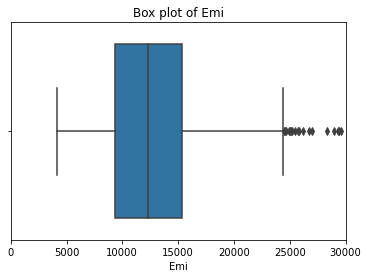

In [214]:
sns.boxplot(df["Emi"])
plt.xlim(0,30000)
plt.title("Box plot of Emi")
plt.show()

Observation:avarge monthly emi was nearly 12,500

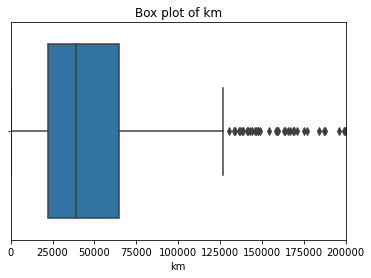

In [224]:
sns.boxplot(df["km"])
plt.xlim(0,200000)
plt.title("Box plot of km")
plt.show()

# Bivariate Analysis

In [ ]:
# Number of cars available in b/w 300000-500000

In [77]:
S_price=df[(df["Price"]>=300000)&(df["Price"]<=500000)]
S_price

,Year,Brand,Model,Engine_Type,Car_Type,Fuel_Type,Owner,km,Price,Discounts,Emi,Locations
10,2015,Maruti,Celerio,ZXI AMT,Automatic,Petrol,1st,46089,454899,5000,10119,Mumbai
16,2015,Maruti,Celerio,VXI AMT,Automatic,Petrol,1st,14997,416899,5000,9274,Mumbai
22,2017,Maruti,Celerio,VXI,Manual,Petrol,1st,66663,403799,5000,8982,Mumbai
29,2014,Hyundai,i20,ASTA 1.2,Manual,Petrol,2nd,9015,496699,5000,11049,Mumbai
31,2014,Maruti,Swift,VXI 1.2 BS IV,Manual,Petrol,2nd,92728,452499,5000,10066,Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...
1177,2018,Hyundai,Grand,MAGNA 1.2 KAPPA VTVT,Manual,Petrol,1st,32373,485699,5000,10804,Chennai
1178,2013,Hyundai,i10,MAGNA 1.2 KAPPA2,Manual,Petrol,2nd,50047,358099,5000,7966,Chennai
1180,2015,Hyundai,Eon,D LITE PLUS,Manual,Petrol,1st,33905,320699,5000,7134,Chennai
1181,2013,Hyundai,i10,MAGNA 1.2 KAPPA2,Manual,Petrol,1st,21243,373199,5000,8302,Chennai


# 1.barplot

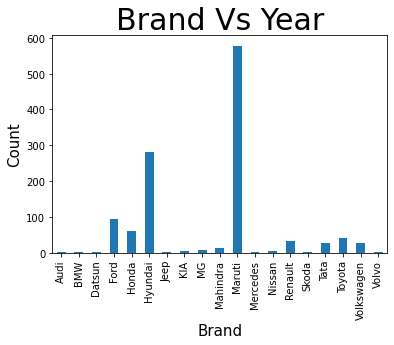

In [96]:
df.groupby(['Brand'])['Year'].count().plot(kind ='bar')
plt.title("Brand Vs Year",size=30)
plt.xlabel("Brand",size=15)
plt.ylabel("Count",size=15)
plt.xticks(rotation =90)
plt.show()

In [137]:
pd.pivot_table(data=df,index=["Locations"],values=["Price"])

,Price
Locations,
Bengaluru,558107.776596
Chennai,607833.950000
Delhi,587789.769231
Hyderabad,590308.257143
Mumbai,672606.019231


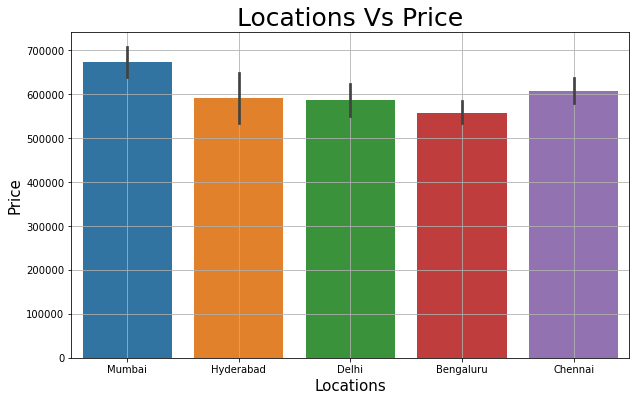

In [98]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["Locations"],y=df["Price"])
plt.title("Locations Vs Price",size=25)
plt.xlabel("Locations",size=15)
plt.ylabel("Price",size=15)
plt.grid()
plt.show()


Text(0, 0.5, 'Price')

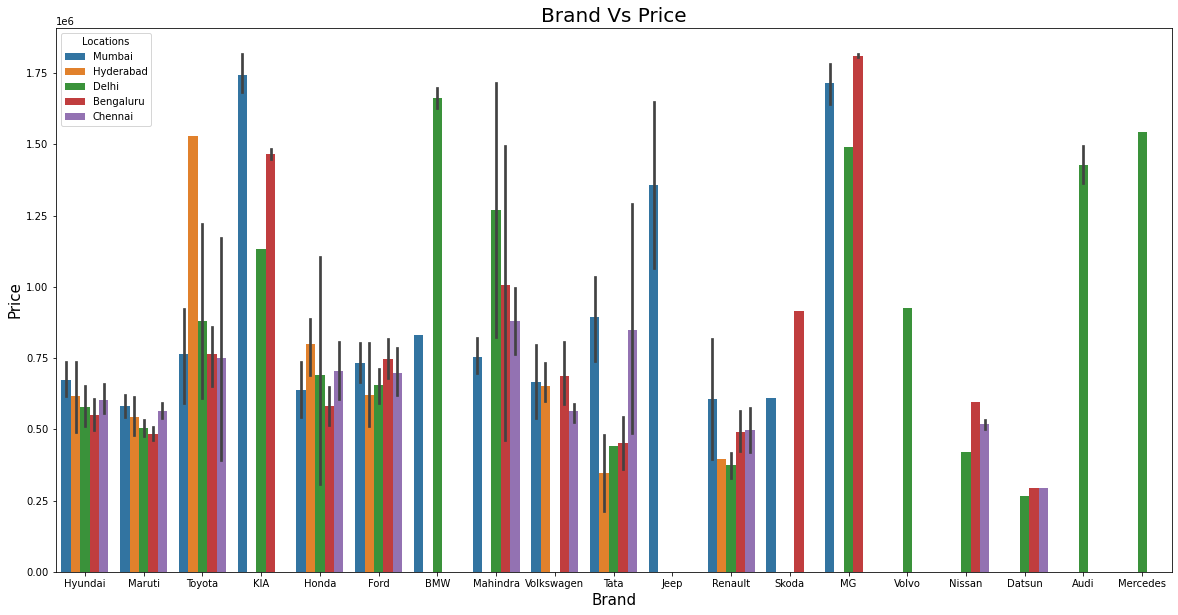

In [102]:
plt.figure(figsize=(20,10))
sns.barplot(x='Brand', y='Price',hue='Locations',data=df)
plt.title("Brand Vs Price",size=20)
plt.xlabel("Brand",size=15)
plt.ylabel("Price",size=15)

Text(0, 0.5, 'Discounts')

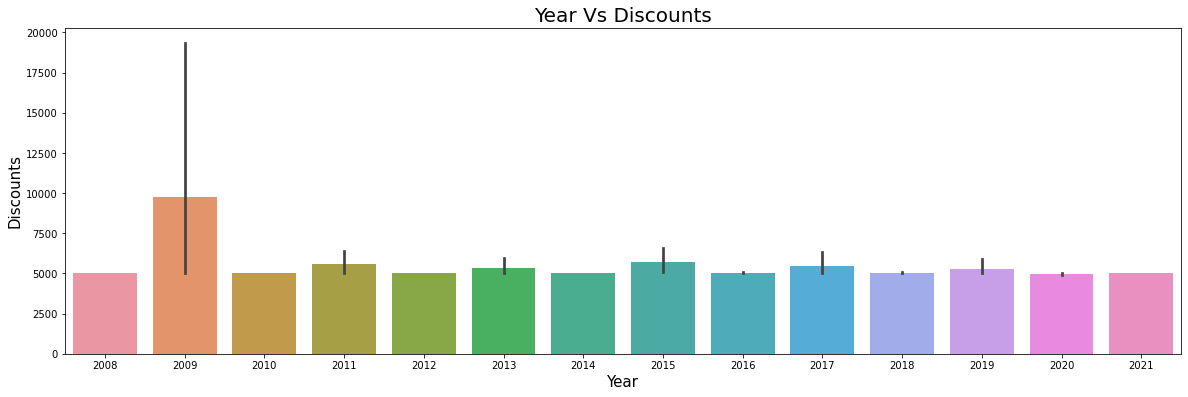

In [235]:
plt.figure(figsize=(20,6))
sns.barplot(x='Year', y='Discounts',data=df)
plt.title("Year Vs Discounts",size=20)
plt.xlabel("Year",size=15)
plt.ylabel("Discounts",size=15)

Text(0, 0.5, 'Emi')

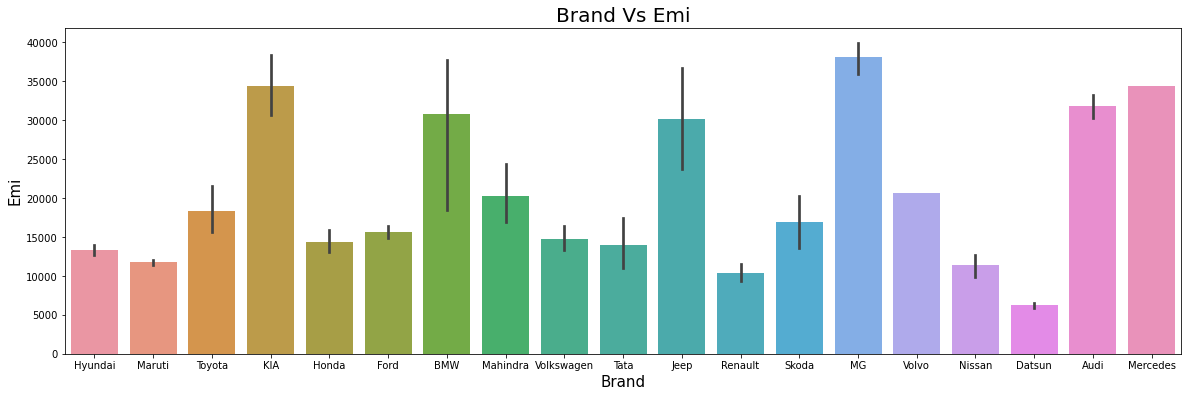

In [227]:
plt.figure(figsize=(20,6))
sns.barplot(x='Brand', y='Emi',data=df)
plt.title("Brand Vs Emi",size=20)
plt.xlabel("Brand",size=15)
plt.ylabel("Emi",size=15)

Obsevation: MG model cars very high Emi compare to other years

Text(0, 0.5, 'Km')

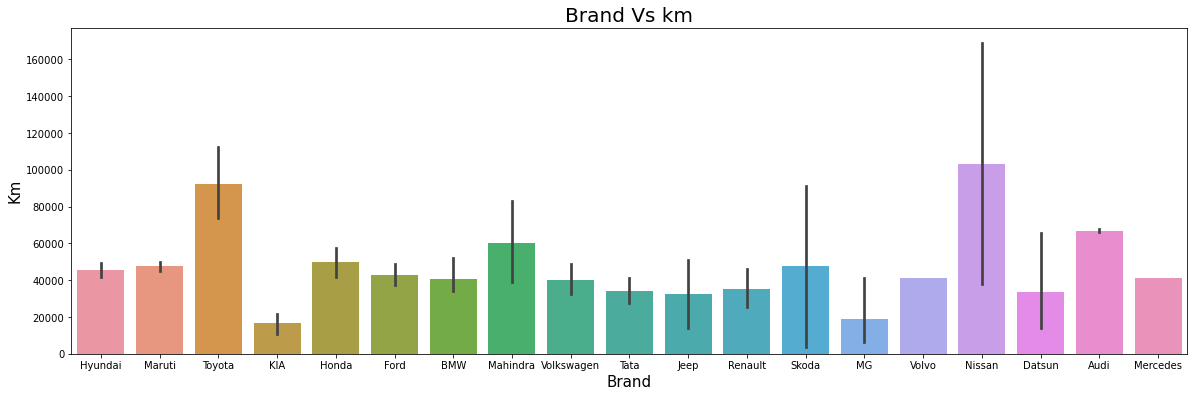

In [230]:
plt.figure(figsize=(20,6))
sns.barplot(x='Brand', y='km',data=df)
plt.title("Brand Vs km",size=20)
plt.xlabel("Brand",size=15)
plt.ylabel("Km",size=15)

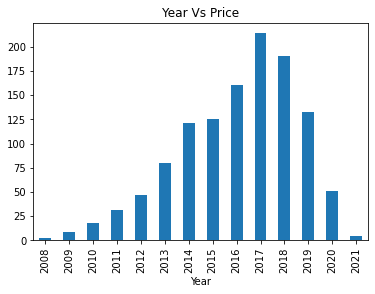

In [100]:
df.groupby(['Year'])['Price'].count().plot(kind ='bar')
plt.title("Year Vs Price")
plt.xticks(rotation =90)
plt.show()

### number of cars in b/w 2012 & 2017

In [126]:
a=df[(df["Year"]>=2012)&(df["Year"]<=2017)]
a

,Year,Brand,Model,Engine_Type,Car_Type,Fuel_Type,Owner,km,Price,Discounts,Emi,Locations
1,2017,Maruti,IGNIS,ZETA 1.2 K12 AMT,Automatic,Petrol,2nd,31550,549099,5000,12214,Mumbai
2,2017,Hyundai,Elite,Magna Executive 1.2,Manual,Petrol,1st,40991,558599,5000,12426,Mumbai
3,2014,Toyota,Corolla,J S,Manual,Petrol,2nd,22359,706299,5000,15711,Mumbai
7,2015,Toyota,Innova,2.5 VX 8 STR BS IV,Manual,Diesel,1st,165870,858699,5000,19101,Mumbai
8,2016,Hyundai,Elite,1.4 CRDI ASTA (O),Manual,Diesel,1st,45565,641499,5000,14270,Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...
1180,2015,Hyundai,Eon,D LITE PLUS,Manual,Petrol,1st,33905,320699,5000,7134,Chennai
1181,2013,Hyundai,i10,MAGNA 1.2 KAPPA2,Manual,Petrol,1st,21243,373199,5000,8302,Chennai
1183,2015,Maruti,Swift,VXI AT,Automatic,Petrol,1st,56836,523599,5000,11647,Chennai
1184,2017,Maruti,Swift,VXI,Manual,Petrol,1st,41245,607599,5000,13516,Chennai


# 2. Boxplot

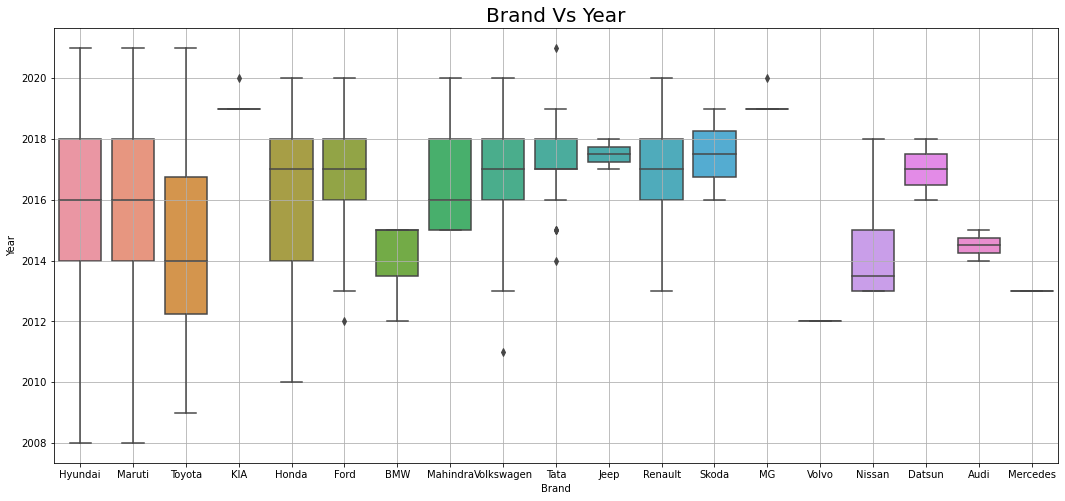

In [105]:

plt.figure(figsize=(18,8))
sns.boxplot(x=df["Brand"],y=df["Year"])
plt.title("Brand Vs Year",size=20)
plt.xlabel("Brand")
plt.ylabel("Year")
plt.grid()
plt.show()


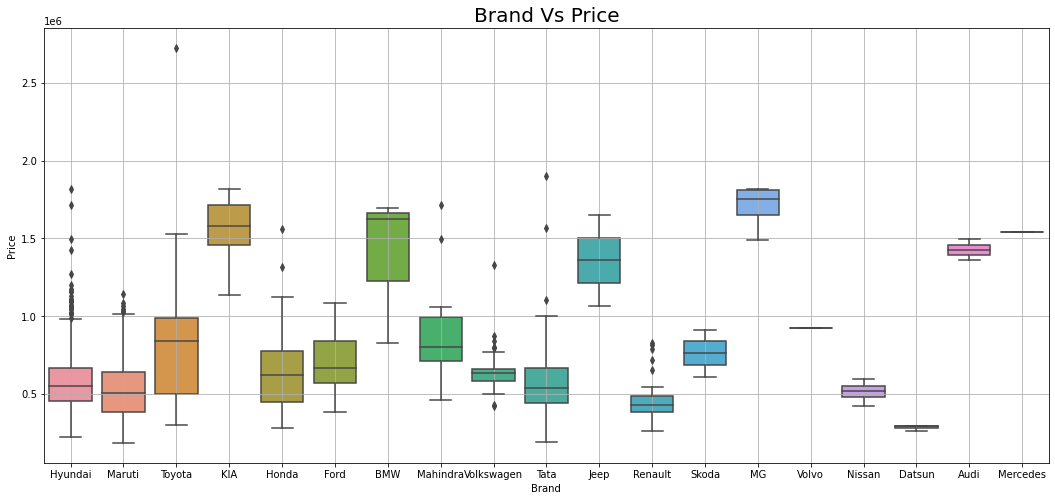

In [237]:

plt.figure(figsize=(18,8))
sns.boxplot(x=df["Brand"],y=df["Price"])
plt.title("Brand Vs Price",size=20)
plt.xlabel("Brand")
plt.ylabel("Price")
plt.grid()
plt.show()


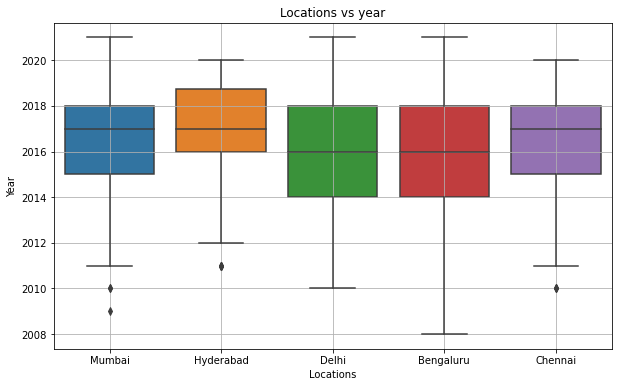

In [106]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["Locations"],y=df["Year"])
plt.title("Locations vs year")
plt.grid()
plt.show()


Observation :  2017 and 2016 model cars availble in all locations

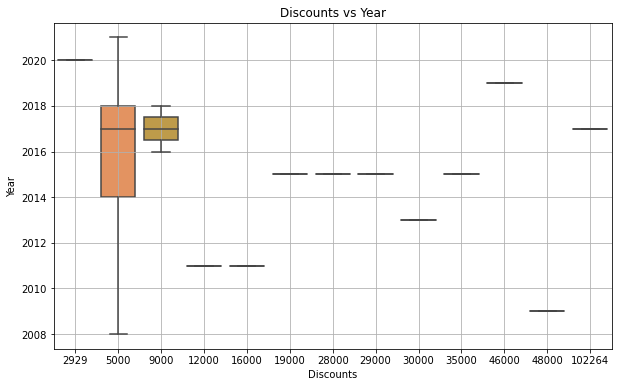

In [107]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["Discounts"],y=df["Year"])
plt.title("Discounts vs Year")
plt.grid()
plt.show()

Observation : Almost number of cars discount nearly 5000

# 3. hist

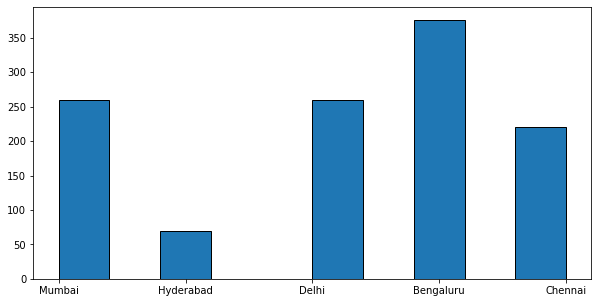

In [76]:
plt.figure(figsize=(10,5))
plt.hist(df["Locations"],bins=10,edgecolor="k")
plt.show()

# 4. Lineplot

<AxesSubplot:xlabel='Year', ylabel='Brand'>

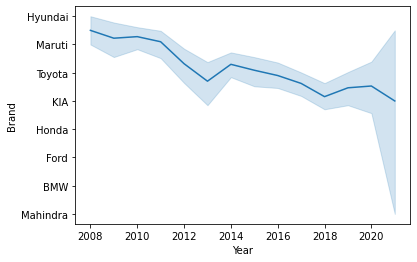

In [78]:
sns.lineplot(x=df["Year"],y=df["Brand"])


# 5.Scatter plot

Text(0.5, 1.0, 'Location vs Brand')

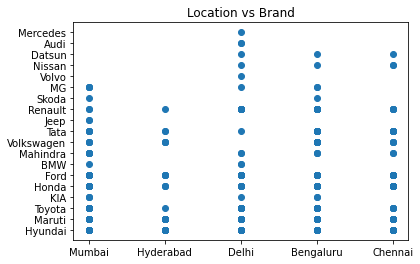

In [238]:
plt.scatter(x=df["Locations"],y=df["Brand"])
plt.title("Location vs Brand")

Observation: In Delhi  almost all branded cars are available

Text(0.5, 1.0, 'Brand Vs Year')

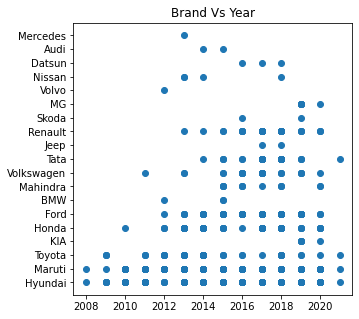

In [239]:
plt.figure(figsize=(5,5))
plt.scatter(y=df["Brand"],x=df["Year"])
plt.title("Brand Vs Year")

Observation : Only Hyundai,maruti brands available in all years 

# 6.regplot

Text(0.5, 1.0, 'Year Vs price')

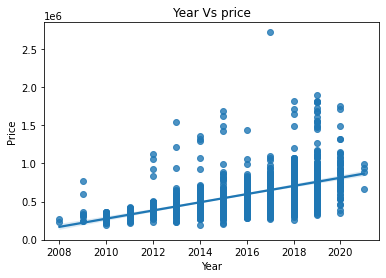

In [240]:
sns.regplot(x=df["Year"],y=df["Price"])
plt.title("Year Vs price")

# Violinplot

<AxesSubplot:xlabel='Fuel_Type', ylabel='Emi'>

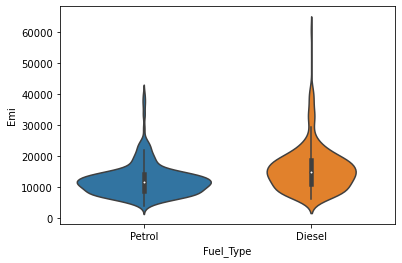

In [81]:
sns.violinplot(x=df["Fuel_Type"],y=df["Emi"])

<AxesSubplot:xlabel='Locations', ylabel='Year'>

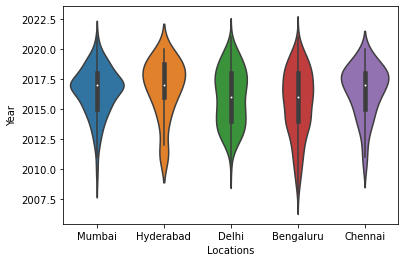

In [88]:
sns.violinplot(x=df["Locations"],y=df["Year"])

# Multivariate Plots

# 1.Pair plot

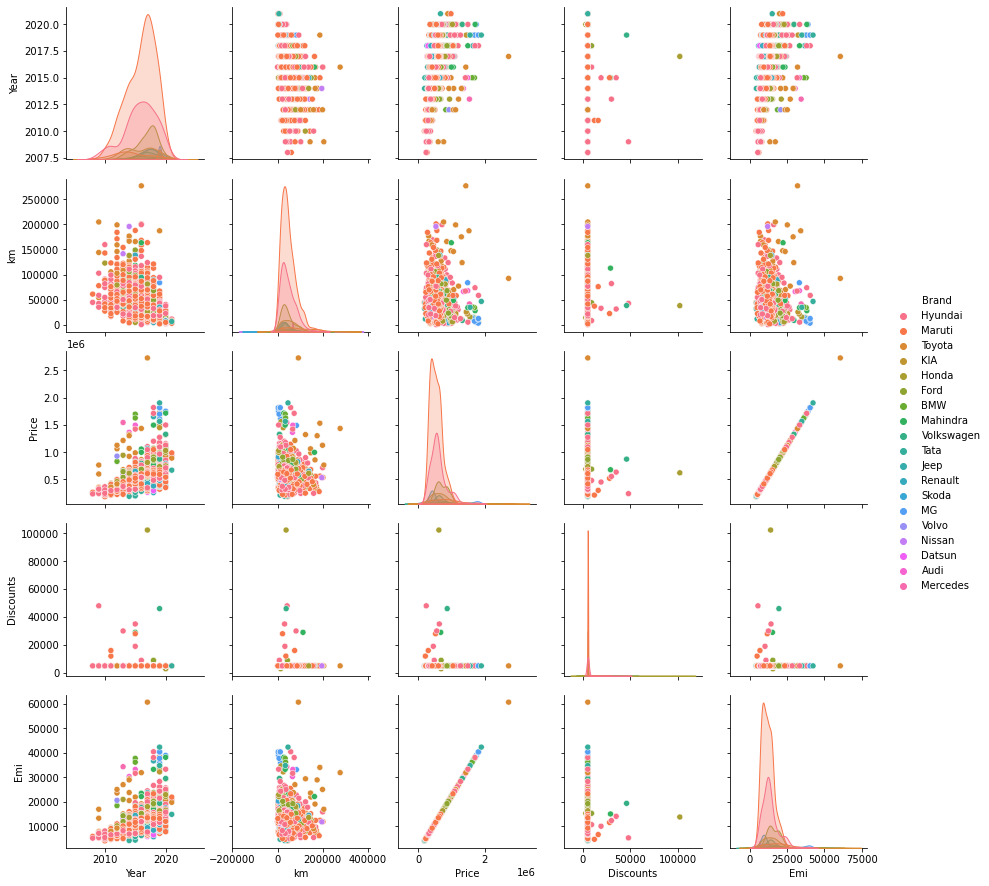

In [83]:
sns.pairplot(data=df,hue="Brand")
plt.show()

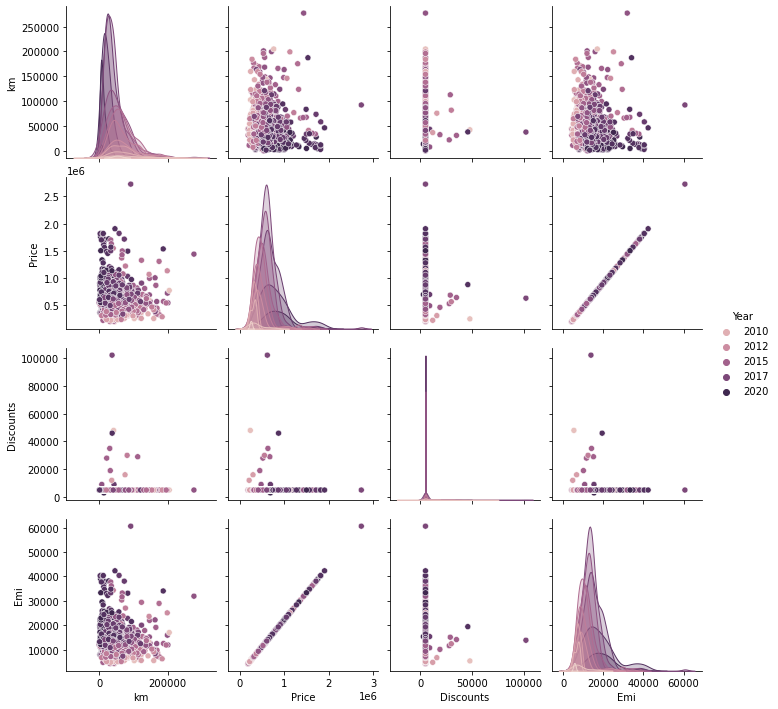

In [110]:
sns.pairplot(data=df,hue="Year")
plt.show()

# 2. correlation heatmap

In [96]:
df.corr()

,Year,km,Price,Discounts,Emi
Year,1.000000,-0.444298,0.490520,-0.033592,0.490519
km,-0.444298,1.000000,-0.107141,-0.001676,-0.107138
Price,0.490520,-0.107141,1.000000,-0.009267,1.000000
Discounts,-0.033592,-0.001676,-0.009267,1.000000,-0.009267
Emi,0.490519,-0.107138,1.000000,-0.009267,1.000000


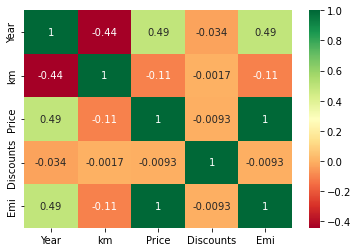

In [97]:
sns.heatmap(df.corr(),cmap='RdYlGn',annot=True)
plt.show()

# Triangle Heat Map

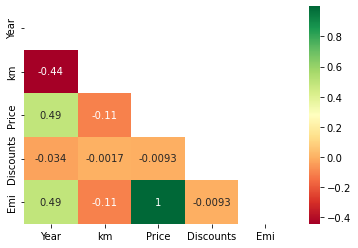

In [109]:
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),cmap='RdYlGn',annot=True,mask=mask)
plt.show() 

In [111]:
df

,Year,Brand,Model,Engine_Type,Car_Type,Fuel_Type,Owner,km,Price,Discounts,Emi,Locations
0,2021,Hyundai,VENUE,S MT 1.2 KAPPA,Manual,Petrol,1st,11197,936099,5000,20823,Mumbai
1,2017,Maruti,IGNIS,ZETA 1.2 K12 AMT,Automatic,Petrol,2nd,31550,549099,5000,12214,Mumbai
2,2017,Hyundai,Elite,Magna Executive 1.2,Manual,Petrol,1st,40991,558599,5000,12426,Mumbai
3,2014,Toyota,Corolla,J S,Manual,Petrol,2nd,22359,706299,5000,15711,Mumbai
4,2019,Hyundai,VENUE,1.0 TURBO GDI SX+ AT,Automatic,Petrol,1st,8917,1162699,5000,25864,Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...
1181,2013,Hyundai,i10,MAGNA 1.2 KAPPA2,Manual,Petrol,1st,21243,373199,5000,8302,Chennai
1182,2018,Maruti,Swift,ZXI,Manual,Petrol,1st,87677,599899,5000,13344,Chennai
1183,2015,Maruti,Swift,VXI AT,Automatic,Petrol,1st,56836,523599,5000,11647,Chennai
1184,2017,Maruti,Swift,VXI,Manual,Petrol,1st,41245,607599,5000,13516,Chennai


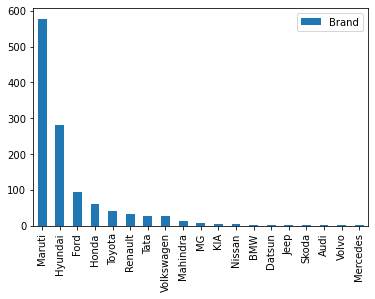

In [37]:
df["Brand"].value_counts().to_frame().plot(kind="bar")
plt.show()